# Artificial Neural Networks with TF2

This notebook contains the regression of boston house prices on with the help of an artificial neural network implemented with Keras Functional API

In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset 
from sklearn.datasets import load_boston
dataset = load_boston()

In [ ]:
#preparing the pandas dataframe
data = pd.DataFrame(dataset['data'],columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])

target = pd.Series(dataset['target'],name='price')
data = pd.concat([data,target],axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


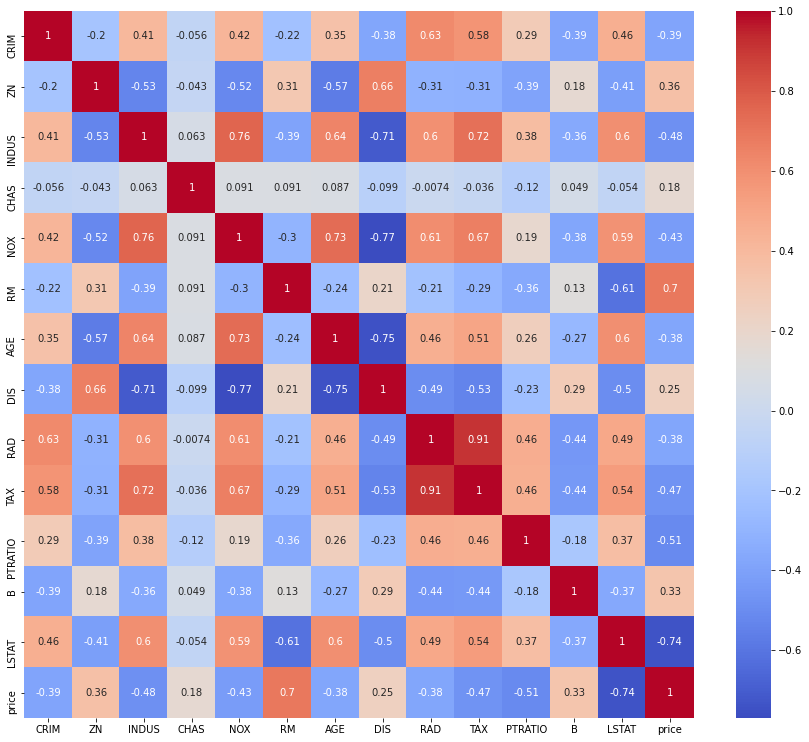

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

# Exploratory Data Analysis

some data pre-processing and feature selection is performed

In [ ]:
#removing unwanted columns
data.drop(['TAX','DIS'],axis=1,inplace=True)

In [ ]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['price'],axis=1),data['price'],test_size=0.15)

In [ ]:
#converting to numpy 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
#normlizing the inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Keras Functional API

In the Linear Regression notebook, I have used sequential layer which has limited functionality and I'll actually never use it for most of the things and always stick to keras Functional API, which allows to define complex models


Here is how to use keras Functional API:

In [ ]:
#creating the model
i = tf.keras.layers.Input(shape=(x_train.shape[1]))
fc1 = tf.keras.layers.Dense(10,activation=tf.keras.activations.relu)(i)
fc2 = tf.keras.layers.Dense(12,activation=tf.keras.activations.relu)(fc1)
fc3 = tf.keras.layers.Dense(20,activation=tf.keras.activations.relu)(fc2)
out = tf.keras.layers.Dense(1)(fc3)

model = tf.keras.models.Model(i,out)

In [ ]:
#optimizers and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.mse)

In [ ]:
#fitting the model to the data
train = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=128)

Epoch 1/100
4/4 [==============================] - 0s 32ms/step - loss: 600.8739 - val_loss: 474.9504
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 598.6235 - val_loss: 472.9960
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 596.2363 - val_loss: 470.8997
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 593.7503 - val_loss: 468.5982
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 591.0505 - val_loss: 466.1109
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 588.2186 - val_loss: 463.4400
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 585.0935 - val_loss: 460.5818
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 581.7434 - val_loss: 457.4816
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 578.0860 - val_loss: 454.1234
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 574.1582 - val_los

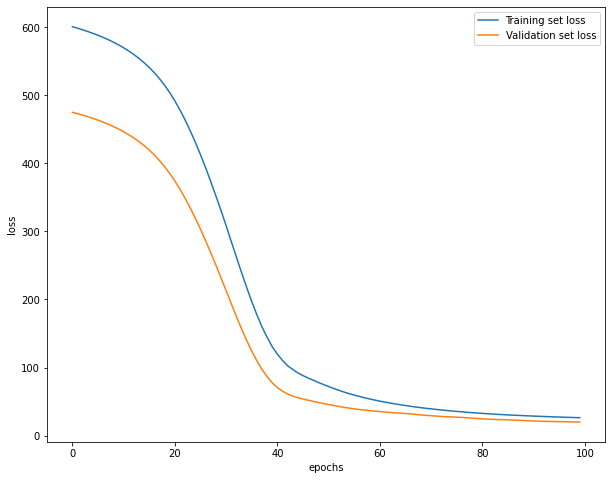

In [ ]:
#loss over epochs
plt.figure(figsize=(10,8))
plt.plot(train.history['loss'],label="Training set loss")
plt.plot(train.history['val_loss'],label="Validation set loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
#making predictions
y_pred = model.predict(x_test).reshape(-1)
comparison = np.stack([y_pred,y_test],axis=1)
comparison[:10,:]

array([[23.12486649, 15.6       ],
       [16.35438919, 15.4       ],
       [14.36493301, 14.9       ],
       [36.68298721, 39.8       ],
       [25.32209778, 23.3       ],
       [17.87156296, 17.4       ],
       [31.92795753, 28.5       ],
       [16.97011566, 20.4       ],
       [36.1361618 , 34.7       ],
       [11.6083498 ,  8.8       ]])

# Model Analyis

model has performed well here as we can see in the below graph

Text(0, 0.5, 'predictions')

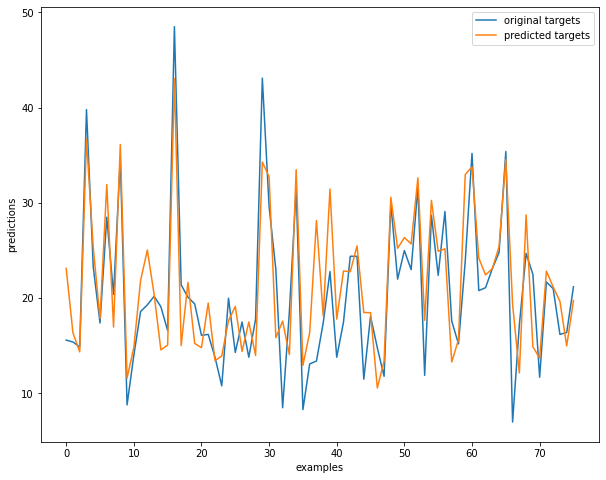

In [ ]:
#precitions vs actual
plt.figure(figsize=(10,8))
plt.plot(y_test,label="original targets")
plt.plot(y_pred,label="predicted targets")
plt.legend()
plt.xlabel('examples')
plt.ylabel('predictions')